In [ ]:
# ADD YOUR ACADEMIC INTERGITY STATEMENT HERE AS A COMMENT BLOCK BELOW. CHECK IMPORTANT NOTE FOR MORE DETAILS.



I certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I did not receive any external help, 
coaching or contributions during the production of this work.




# END OF YOUR ACADEMIC INTERGITY STATEMENT

In [ ]:
'''
Part 2: Logistic Regression
'''

'\nPart 2: Logistic Regression\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/Colab\ Notebooks/cse574_intro_machine_learning/assignment2/
!ls

Mounted at /content/drive
/
/content/drive/MyDrive/Colab Notebooks/cse574_intro_machine_learning/assignment2
 Amazon_top_selling_book.csv
 breast_cancer_wisconsin.csv
 diamonds.csv
 netflix_titles.csv
 part2_logistic_regression.ipynb
'Part I Data Analysis Amazon Top Selling Book dataset, Netflix dataset, Penguin dataset.ipynb'
 penguins.csv
 spring22_cse574_cd_Assignment_2_ver2.pdf
 titanic.csv
 winequality-red.csv


Cost after iteration 0 is 0.933290
Cost after iteration 5000 is 0.932318
Cost after iteration 10000 is 0.931349
Cost after iteration 15000 is 0.930382
Cost after iteration 20000 is 0.929416
Cost after iteration 25000 is 0.928453
Cost after iteration 30000 is 0.927492
Cost after iteration 35000 is 0.926533
Cost after iteration 40000 is 0.925576
Cost after iteration 45000 is 0.924621
Cost after iteration 50000 is 0.923668
Cost after iteration 55000 is 0.922717
Cost after iteration 60000 is 0.921768
Cost after iteration 65000 is 0.920821
Cost after iteration 70000 is 0.919876
Cost after iteration 75000 is 0.918934
Cost after iteration 80000 is 0.917993
Cost after iteration 85000 is 0.917054
Cost after iteration 90000 is 0.916118
Cost after iteration 95000 is 0.915183


{'W': array([[0.98704615],
        [0.98772263],
        [0.98453735],
        [0.98884714]]),
 'accuracy_test': 0.7692307692307692,
 'accuracy_train': 0.7105263157894737,
 'b': -0.03495479381262566,
 'iteration_nums': 100000,
 'learning_rate': 1e-06}

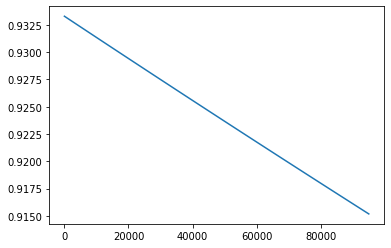

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class LogitRegression:

  # Preprocessing data to X_train, Y_train, X_test and Y_test
  def preprocessing(self):
    df = pd.read_csv("penguins.csv") # Read penguins.csv file
    df = pd.DataFrame(df)
    df = df[df.sex.notnull()] # Delete rows without sex

    # Change 5 data columns to list
    b_len_list = df['bill_length_mm'].tolist()
    b_depth_list = df['bill_depth_mm'].tolist()
    f_len_list = df['flipper_length_mm'].tolist()
    b_mass_list = df['body_mass_g'].tolist()
    sex_list = df['sex'].tolist()

    # Get largest element of every list
    b_len_list_max = max(b_len_list)
    b_depth_list_max = max(b_depth_list)
    f_len_list_max = max(f_len_list)
    b_mass_list_max = max(b_mass_list)

    # Get smallest element of every list
    b_len_list_min = min(b_len_list)
    b_depth_list_min = min(b_depth_list)
    f_len_list_min = min(f_len_list)
    b_mass_list_min = min(b_mass_list)

    # Randomly sort each list with same random index
    shuffle_indices = np.random.permutation(np.arange(333))
    
    # Scale data to range 0 to 1
    b_len = (np.array(b_len_list) - b_len_list_min) / (b_len_list_max - b_len_list_min)
    b_depth = (np.array(b_depth_list) - b_depth_list_min) / (b_depth_list_max - b_depth_list_min)
    f_len = (np.array(f_len_list) - f_len_list_min) / (f_len_list_max - f_len_list_min)
    b_mass = (np.array(b_mass_list) - b_mass_list_min) / (b_mass_list_max - b_mass_list_min)

    # Randomly sort each list
    b_len = b_len[shuffle_indices]
    b_depth = b_depth[shuffle_indices]
    f_len = f_len[shuffle_indices]
    b_mass = b_mass[shuffle_indices]

 
    
    # Concatenate four arrays into one array X_train, using 80% of all data
    X_train = np.vstack((b_len[0:266], b_depth[0:266], f_len[0:266], b_mass[0:266]))
    # Build X_test using 20% of all data for test purpose
    X_test = np.vstack((b_len[267:332], b_depth[267:332], f_len[267:332], b_mass[267:332]))
    #print(np.shape(X))

    # Change sex to 0 and 1 data
    Y = [] # Target
    for i in range(len(sex_list)):
      if sex_list[i] == 'female':
        Y.append(0)
      elif sex_list[i] == 'male':
        Y.append(1)
    
    # Randomly sort Y
    Y = np.array(Y)
    Y = Y[shuffle_indices]
    
    # Divide Y data into 80% and 20%
    Y_train = np.array(Y[0:266])
    Y_test = np.array(Y[267:332])

    #print('X_train:',np.shape(X_train))
    #print('X_test:',np.shape(X_test))
    return X_train, Y_train, X_test, Y_test

  # __init__ function
  def __init__(self, learning_rate, iteration_num) -> None:
    self.learning_rate = learning_rate
    self.iteration_num = iteration_num

  def sigmoid(self, z):
    theta = 1 / (1 + np.exp(-z))
    return theta

  def propagate(self, w, b, X, Y):
    n = X.shape[1] # Number of samples

    # Forward propagate
    h = self.sigmoid(np.dot(w.T, X) + b)
    cost = - (np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))) / n

    # Back propagate
    #print(np.shape(h), np.shape(Y))
    dZ = h - Y
    dw = (np.dot(X, dZ.T)) / n
    db = (np.sum(dZ)) / n
    #print('dz:',np.shape(dZ))

    # Return value
    return dw, db, cost

  def fit(self, w, b, X, Y, iteration_num, learning_rate):
    costs = [] # Store all costs
    ite_times = [] # Store iteration times
    # Iterate to get satisfied w and b
    for i in range(iteration_num):
      dw, db, cost = self.propagate(w, b, X, Y)

      # Use gradient descent to update w and b
      w = w - learning_rate * dw
      b = b - learning_rate * db

      # Print cost every 5000 iterations
      if i % 5000 == 0:
        costs.append(cost)
        ite_times.append(i)
        print('Cost after iteration %i is %f' %(i, cost))
    plt.plot(ite_times, costs)
    return w, b, dw, db

  def predict(self, w, b, X):
    n = X.shape[1]
    Y_prediction = np.zeros((1, n))

    h = self.sigmoid(np.dot(w.T, X) + b)
    for i in range(n):
      #print('h[0, i]:',h)
      if h[0, i] > 0.85:
        Y_prediction[0, i] = 1
      else:
        Y_prediction[0, i] = 0
    return Y_prediction
  
  def logistic_model(self, learning_rate, iteration_nums):
    X_train, Y_train, X_test, Y_test = self.preprocessing() # Get input data
    dim = X_train.shape[0]
    W = np.ones((4, 1)) # Set initial W as [1, 1, 1, 1]
    b = 0

    # Call fit() function to acquire W and b after certain iterations
    W, b, dw, db = self.fit(W, b, X_train, Y_train, iteration_nums, learning_rate)

    # Call predict() function to get prediction value
    prediction_train = self.predict(W, b, X_train)
    prediction_test = self.predict(W, b, X_test)

    # Get train accuracy and test accuracy by calculating mean
    accuracy_train = 1 - np.mean(np.abs(prediction_train - Y_train))
    accuracy_test = 1 - np.mean(np.abs(prediction_test - Y_test))
    #print("accuracy_train:",accuracy_train)
    #print("accuracy_test:",accuracy_test)

    res = {"accuracy_train": accuracy_train,
         "accuracy_test": accuracy_test,
         "learning_rate": learning_rate,
         "iteration_nums": iteration_nums,
         "W" : W,
         "b" : b
        }
    
    # Return the result as a dictionary which stores all relevant values
    return res

# Set learning rate and iteration times
learning_rate = 0.000001
iteration_num = 100000

# Call class
model = LogitRegression(learning_rate, iteration_num)
model.logistic_model(learning_rate, iteration_num)